In [3]:
#plots.py

# for good measure, you may choose to import pandas and matplotlib with the following commands
# import matplotlib.pyplot as plt
# import pandas as pd

import datetime
from datlib.FRED import *
#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"30 Year Mortgage Rates": "MORTGAGE30US",
               "Base: Currency in Circulation": "MBCURRCIRW",
               "Excess Reserves": "EXCSRESNW",
              "30 Year Treasury Rate": "DGS30",
              "CPI": "CPIAUCSL"}
# Select start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
#                                       day, week, month, quarter, annual
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "M")


In [6]:
data["CPI Inflation"] = data["CPI"].pct_change(12).mul(100)
data

,30 Year Mortgage Rates,Base: Currency in Circulation,Excess Reserves,30 Year Treasury Rate,CPI,CPI Inflation
DATE,,,,,,
2000-01-31,8.2100,594679.00,2246.0,6.625500,169.300,NaN
2000-02-29,8.3250,566144.00,1159.5,6.232000,170.000,NaN
2000-03-31,8.2400,563820.60,1136.2,6.053478,171.000,NaN
2000-04-30,8.1525,564597.25,1223.5,5.846316,170.900,NaN
2000-05-31,8.5150,565829.60,974.2,6.148636,171.200,NaN
...,...,...,...,...,...,...
2022-08-31,5.2225,NaN,NaN,3.129565,295.620,8.249235
2022-09-30,6.1120,NaN,NaN,3.558095,296.761,8.222410
2022-10-31,6.9000,NaN,NaN,4.040000,298.062,7.763115


<AxesSubplot:xlabel='DATE'>

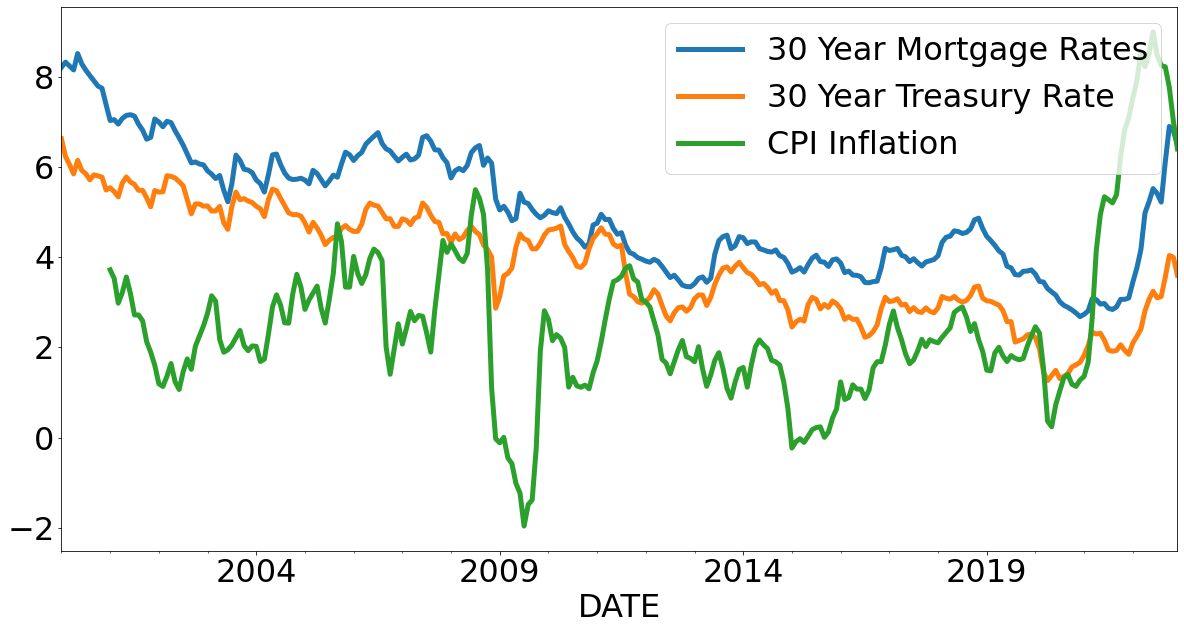

In [11]:
plt.rcParams.update({"font.size":32})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
data[["30 Year Mortgage Rates", "30 Year Treasury Rate", "CPI Inflation"]].plot.line(linewidth = 5, ax = ax)

<AxesSubplot:xlabel='DATE'>

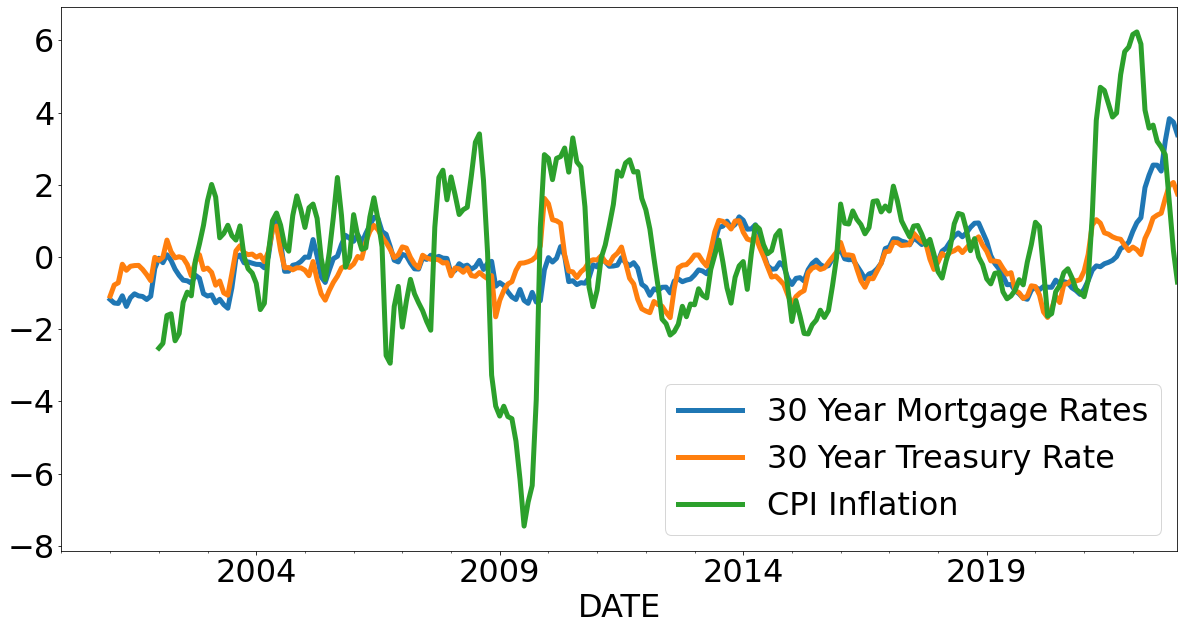

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
data[["30 Year Mortgage Rates", "30 Year Treasury Rate", "CPI Inflation"]].diff(12).plot.line(linewidth = 5, ax = ax)

<AxesSubplot:xlabel='CPI Inflation', ylabel='30 Year Treasury Rate'>

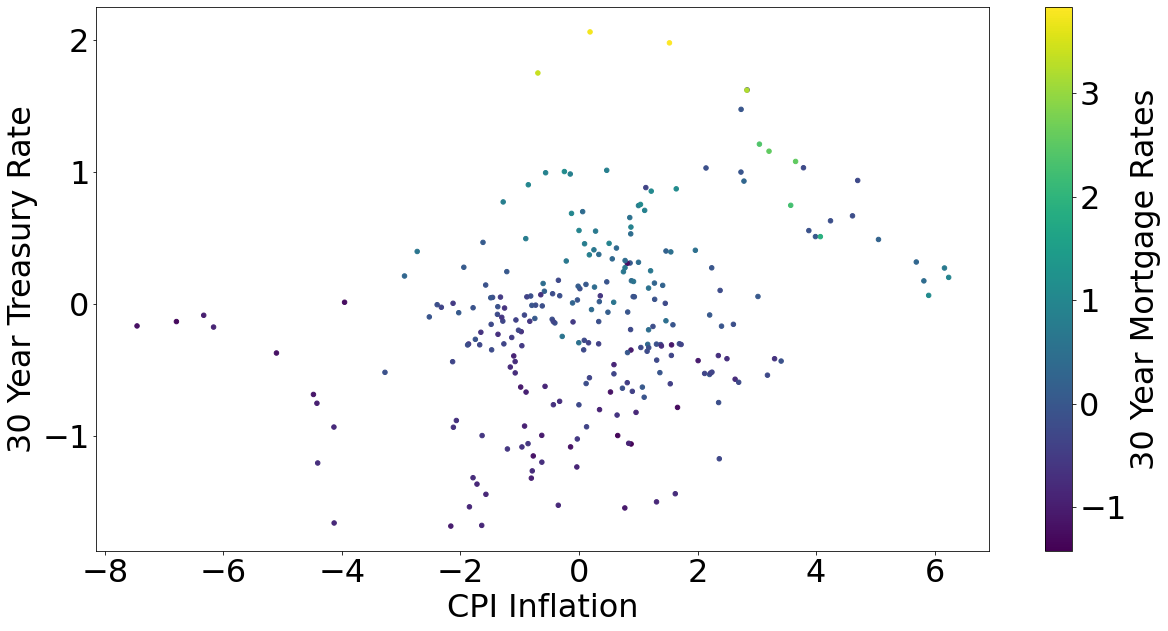

In [19]:
fig, ax = plt.subplots(figsize = (20,10))

data.diff(12).plot.scatter(x =  "CPI Inflation", c = "30 Year Mortgage Rates", y = "30 Year Treasury Rate", cmap = "viridis", ax = ax)